# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Path where data is loaded from
DATA_FPATH = 'data/sim_2022_03_10.npz'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_03_10.pt'

# Number of units in RNN
NUM_UNITS = 32

## Load simulation

In [3]:
sim = motion.load_simulation(DATA_FPATH)
dset = sim.to_dataset()

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
pos_est = model(dset.vel)
pos_est_plt = pos_est[0].detach().numpy()

## Plot results

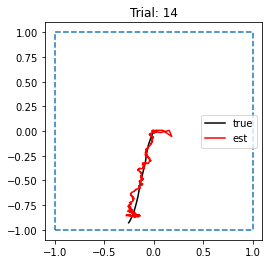

In [10]:
trial_plt = 14

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')

motion.plot_position_estimate(sim.boundary, sim.pos[trial_plt], pos_est_plt[trial_plt], ax)